<a href="https://colab.research.google.com/github/31ldts/IFP-organizer/blob/main/ifp_organizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API's install and import

In [9]:
!pip install mplcursors --upgrade
!pip install -i https://test.pypi.org/simple/ ifp-organizer

Looking in indexes: https://test.pypi.org/simple/


In [4]:
from ifp_organizer import AnalyzeInteractions
analyzer = AnalyzeInteractions()

## Change working directory

Changes the working directory for saving or input operations.

```python
def change_directory(self, path: str, mode: str) -> None
```
```python
Args:
    path (str): Name of the subdirectory to switch to.
    mode (str): Determines whether to change the input or output directory.
        - 'input': Sets the directory for input files.
        - 'output': Sets the directory for output files.

```

In [5]:
analyzer.change_directory(path="output", mode="output")
analyzer.change_directory(path="input", mode="input")

## Custom interaction settings

Configures interaction settings, including labels, colors, and visualization parameters.

```python
def set_config(self, interactions: list[str] = None, plot_max_cols: int = None, plot_colors: list[str] = None, reset: bool = False, mode: str = None, heat_max_cols: int = None, heat_colors: str = None, interaction_data: InteractionData = None ) -> None
```

```python
Args:
    interactions (list[str], optional): List of interaction labels.
    plot_max_cols (int, optional): Maximum number of columns for plot visualization.
    plot_colors (list[str], optional): List of colors in hexadecimal format.
    reset (bool, optional): If True, resets configurations to default values.
    mode (str, optional): Determines preset configurations for different analysis modes ('ichem' or 'arpeggio').
    heat_max_cols (int, optional): Maximum number of columns for heatmap visualization.
    heat_colors (str, optional): Color scheme for heatmaps.
    interaction_data (InteractionData, optional): Object containing interaction settings to be applied.
```

## Analyze files

Analyzes interaction data files in a specified directory, processing them according to the specified mode.
```python
def analyze_files(self, directory: str, mode: str, activity_file: str = None, protein: bool = True, ligand: bool = True, subunit: bool = False, save: str = None) -> InteractionData
```
```python
Args:
    directory (str): Path to the directory containing interaction data files.
    mode (str): Processing mode. Supported modes:
        - 'ichem': Processes IChem interaction files.
        - 'arpeggio': Processes Arpeggio interaction files.
    activity_file (str, optional): Path to a CSV file containing activity data for annotation.
    protein (bool, optional): Whether to include protein atoms in the analysis. Defaults to True.
    ligand (bool, optional): Whether to include ligand atoms in the analysis. Defaults to True.
    subunit (bool, optional): Whether to differentiate between protein subunits. Defaults to False.
    save (str, optional): Path to save the processed interaction matrix. Defaults to None.
```

In [6]:
data = analyzer.analyze_files(directory="ichem-ifp", mode='ichem', activity_file="ichem-ifp-activities.csv")

## Generate graphics

Generate a bar chart based on interaction data.
```python
def bar_chart(self, interaction_data: InteractionData, plot_name: str, axis: str, label_x: str = None, label_y: str = "Number of intermolecular interactions", title: str = "Protein-drug interactions", stacked: bool = False, save: bool = False, colors: list[str] = None, type_count: bool = False) -> None
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    plot_name (str): Name of the plot (used for saving).
    axis (str): Defines whether to plot rows ('rows') or columns ('columns').
    label_x (str, optional): Label for the x-axis. Defaults to "Interacting protein residues".
    label_y (str, optional): Label for the y-axis. Defaults to "Number of intermolecular interactions".
    title (str, optional): Title of the chart. Defaults to "Protein-drug interactions".
    stacked (bool, optional): If True, creates a stacked bar chart. Defaults to False.
    save (bool, optional): If True, saves the chart as a PNG file. Defaults to False.
    colors (list[str], optional): List of colors for interaction types. Defaults to None.
    type_count (bool, optional): If True, counts the occurrences of each interaction type. Defaults to False.
```

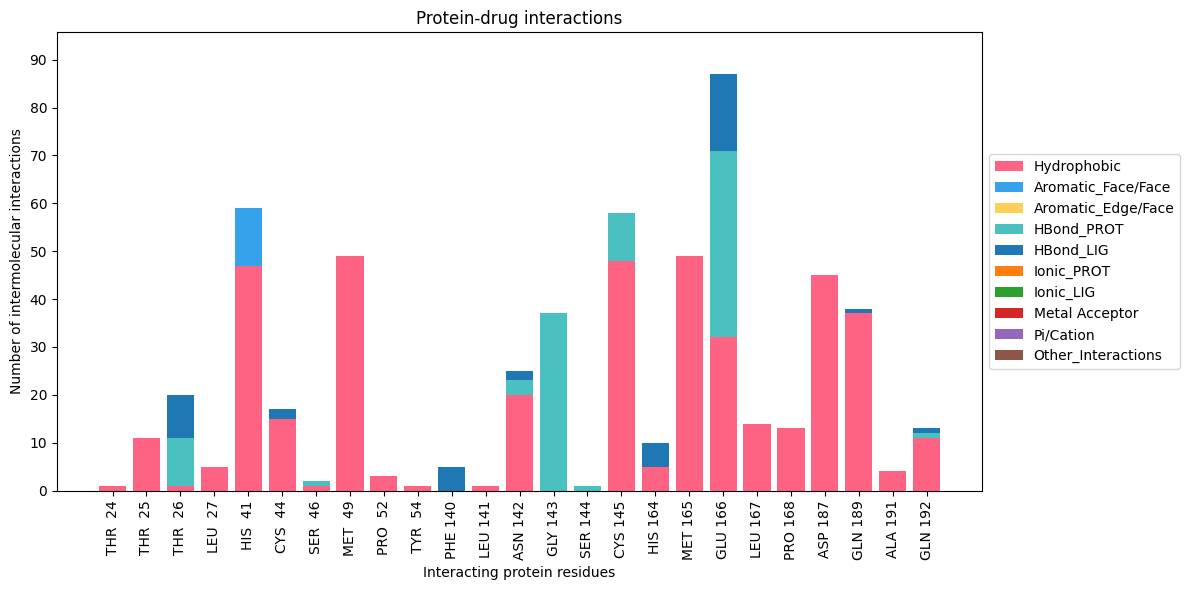

In [11]:
analyzer.bar_chart(interaction_data=data, plot_name="test", axis="rows", stacked=True, save=False)

Generate a pie chart based on interaction data.
```python
def pie_chart(self, interaction_data: InteractionData, plot_name: str, axis: str, save: bool = False, colors: list[str] = None, type_count: bool = False) -> None
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    plot_name (str): The name of the plot (used for saving).
    axis (str): Defines whether to analyze rows ('rows') or columns ('columns').
    save (bool, optional): If True, saves the pie chart instead of displaying it. Defaults to False.
    colors (list[str], optional): List of colors for interaction types. Defaults to None.
    type_count (bool, optional): If True, counts the occurrences of each interaction type instead of using interaction values. Defaults to False.
```

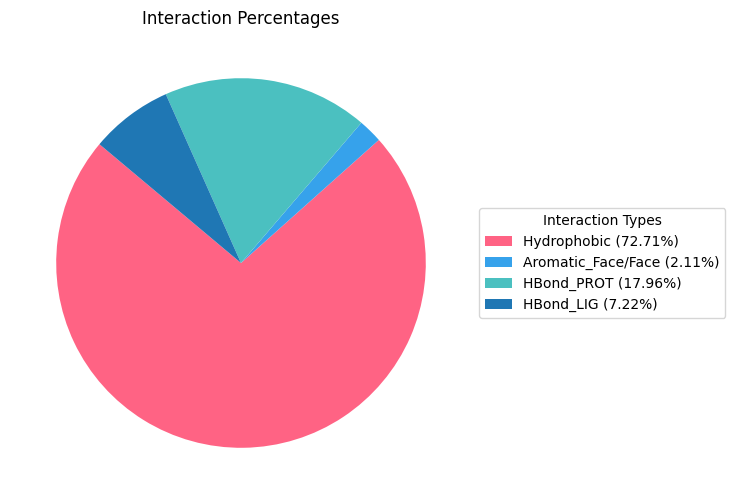

In [12]:
analyzer.pie_chart(interaction_data=data, plot_name="test", axis="rows", save=False)

Generate a heatmap based on interaction data using different processing modes.
```python
def heatmap(self, interaction_data: InteractionData, title: str, mode: str, x_label: str = "", y_label: str = "", min_v: int = None, max_v: int = None, save: bool = False)
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    title (str): Title of the heatmap.
    mode (str): Processing mode ('min', 'max', 'mean', 'count', or 'percent').
    x_label (str, optional): Label for the x-axis. Defaults to an empty string.
    y_label (str, optional): Label for the y-axis. Defaults to an empty string.
    min_v (int, optional): Minimum value for the heatmap color scale. Defaults to None (auto-scaling).
    max_v (int, optional): Maximum value for the heatmap color scale. Defaults to None (auto-scaling).
    save (bool, optional): If True, saves the heatmap instead of displaying it. Defaults to False.
```

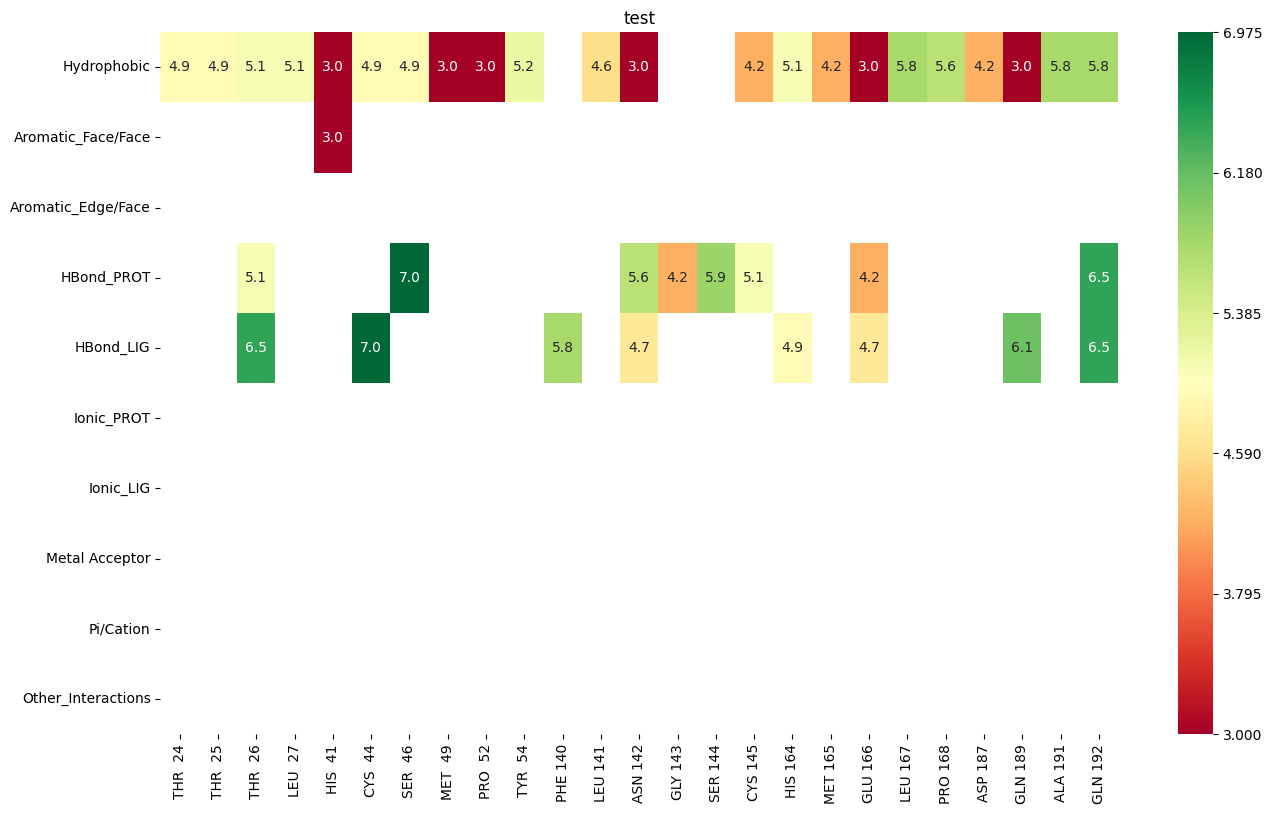

In [13]:
analyzer.heatmap(interaction_data=data, title="test", mode='min', save=False)

##Filter data

Filter an interaction matrix based on specified interaction types.
```python
def filter_by_interaction(self, interaction_data: InteractionData, interactions: list[int], save: str = None) -> InteractionData
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    interactions (list[int]): List of valid interaction types (numbers 1 to 7) to retain in the matrix.
    save (str, optional): File path to save the filtered matrix. Defaults to None.
```

In [17]:
data_filtered = analyzer.filter_by_interaction(interaction_data=data, interactions=[1,2,3], save="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx


Filter an interaction matrix based on specified subunits.
```python
def filter_by_subunit(self, interaction_data: InteractionData, subunits: list[str], save: str = None) -> InteractionData
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    subunits (list[str]): List of valid subunits used as filtering criteria.
    save (str, optional): File path to save the filtered matrix. Defaults to None.

```

In [18]:
data_filtered = analyzer.filter_by_subunit(interaction_data=data, subunits=["A", "B"], save="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx


Filter an interaction matrix based on a specified chain or subpockets.
```python
def filter_chain(self, interaction_data: InteractionData, chain: str = None, subpocket_path: str = None, subpockets: list[str] = None, save: str = None) -> InteractionData
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    chain (str, optional): Specifies whether to retain "<main>" or "<side>" interactions. Defaults to None.
    subpocket_path (str, optional): Path to the file containing subpocket residue definitions. Defaults to None.
    subpockets (list[str], optional): List of subpockets to use for residue-based filtering. Defaults to None.
    save (str, optional): File path to save the filtered matrix. Defaults to None.
```

In [21]:
data_filtered = analyzer.filter_chain(interaction_data=data, chain="<side>", subpocket_path="subpockets.csv", subpockets=["S1'", "S2"], save="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx


##Sort data

Sort and filter rows or columns in the interaction matrix based on interaction criteria.
```python
def sort_matrix(self, interaction_data: InteractionData, axis: str = 'rows', thr_interactions: int = None, thr_activity: float = None, selected_items: int = None, count: bool = False, residue_chain: bool = False, save: str = None) -> InteractionData
```
```python
Args:
    interaction_data (InteractionData): The interaction data to be sorted.
    axis (str, optional): Specifies whether to sort rows ('rows') or columns ('columns'). Defaults to 'rows'.
    thr_interactions (int, optional): Minimum number of interactions required to retain a row/column.
    thr_activity (float, optional): Minimum activity value required to retain a row/column.
    selected_items (int, optional): Number of top rows/columns to keep based on interaction count.
    count (bool, optional): If True, returns the count of interactions instead of modifying the matrix.
    residue_chain (bool, optional): If True, sorts the resulting matrix based on residue order in the chain.
    save (str, optional): File path to save the resulting matrix. Defaults to None.
```

In [24]:
data_sorted = analyzer.sort_matrix(interaction_data=data, thr_activity=6.0, save="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx


## Remove empty

Remove empty rows and columns from the interaction matrix.
```python
def remove_empty_axis(self, interaction_data: InteractionData, save: str = None) -> InteractionData
```
```python
Args:
    interaction_data (InteractionData): The input interaction data from which empty rows and columns will be removed.
    save (str, optional): The filename to save the cleaned matrix. If None, the matrix will not be saved.
```

In [25]:
data_removed = analyzer.remove_empty_axis(interaction_data=data, save="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx


##Save data

Each method allow to save the data, but it can also be saved by the following one.
```python
def save_interaction_data(self, interaction_data: InteractionData, filename: str) -> None:
```
```python
Args:
    interaction_data (InteractionData): The interaction data to be saved.
    filename (str): The name of the output file (must end with '.xlsx').
```

In [26]:
analyzer.save_interaction_data(interaction_data=data, filename="test.xlsx")

Interaction data successfully saved to /content/output/test.xlsx
